<a href="https://colab.research.google.com/github/eyuel693/CNN_SNM/blob/main/MLP_and_CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import time

In [ ]:
from sklearn.model_selection import train_test_split


(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full,
    test_size=0.2,
    stratify=y_train_full,
    random_state=42
)

y_train_cat = to_categorical(y_train, 10)
y_val_cat   = to_categorical(y_val, 10)
y_test_cat  = to_categorical(y_test, 10)


class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

print(f"Training samples:   {x_train.shape[0]} {x_train.shape}")
print(f"Validation samples: {x_val.shape[0]} {x_val.shape}")
print(f"Test samples:       {x_test.shape[0]} {x_test.shape}")
print(f"Image shape:        {x_train.shape[1:]}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Training samples:   40000 (40000, 32, 32, 3)
Validation samples: 10000 (10000, 32, 32, 3)
Test samples:       10000 (10000, 32, 32, 3)
Image shape:        (32, 32, 3)


In [ ]:
mlp_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
], name="MLP")

mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\n=== MLP Architecture ===")
mlp_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



=== MLP Architecture ===


Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
], name="CNN")

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\n=== CNN Architecture ===")
cnn_model.summary()


=== CNN Architecture ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)
print("Data augmentation ready for CNN (fitted on train set only)")

Data augmentation ready for CNN (fitted on train set only)


In [ ]:
print("\nTraining MLP...")
start_time = time.time()
mlp_history = mlp_model.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val_cat),
    verbose=2
)
mlp_train_time = time.time() - start_time
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(x_test, y_test_cat, verbose=0)

print(f"MLP Test Loss: {mlp_test_loss:.4f}")
print(f"MLP Test Accuracy: {mlp_test_acc:.4f}")


Training MLP...
Epoch 1/20
625/625 - 6s - 9ms/step - accuracy: 0.3204 - loss: 1.8884 - val_accuracy: 0.3502 - val_loss: 1.7903
Epoch 2/20
625/625 - 2s - 3ms/step - accuracy: 0.3872 - loss: 1.7006 - val_accuracy: 0.4119 - val_loss: 1.7299
Epoch 3/20
625/625 - 2s - 3ms/step - accuracy: 0.4196 - loss: 1.6175 - val_accuracy: 0.4376 - val_loss: 1.6001
Epoch 4/20
625/625 - 2s - 3ms/step - accuracy: 0.4437 - loss: 1.5544 - val_accuracy: 0.4500 - val_loss: 1.5444
Epoch 5/20
625/625 - 2s - 3ms/step - accuracy: 0.4620 - loss: 1.5090 - val_accuracy: 0.4482 - val_loss: 1.5586
Epoch 6/20
625/625 - 2s - 3ms/step - accuracy: 0.4733 - loss: 1.4700 - val_accuracy: 0.4608 - val_loss: 1.5234
Epoch 7/20
625/625 - 2s - 4ms/step - accuracy: 0.4858 - loss: 1.4410 - val_accuracy: 0.4690 - val_loss: 1.5007
Epoch 8/20
625/625 - 2s - 3ms/step - accuracy: 0.4940 - loss: 1.4127 - val_accuracy: 0.4816 - val_loss: 1.4821
Epoch 9/20
625/625 - 2s - 3ms/step - accuracy: 0.5051 - loss: 1.3866 - val_accuracy: 0.4826 - v

In [ ]:
print("\nTraining CNN with data augmentation...")
start_time = time.time()
cnn_history = cnn_model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=64),
    epochs=20,
    validation_data=(x_val, y_val_cat),
    verbose=2
)
cnn_train_time = time.time() - start_time
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=0)

print(f"CNN Test Loss: {cnn_test_loss:.4f}")
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}")


Training CNN with data augmentation...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 - 27s - 43ms/step - accuracy: 0.3398 - loss: 1.7845 - val_accuracy: 0.4921 - val_loss: 1.4343
Epoch 2/20
625/625 - 21s - 33ms/step - accuracy: 0.4509 - loss: 1.5267 - val_accuracy: 0.5457 - val_loss: 1.2768
Epoch 3/20
625/625 - 20s - 33ms/step - accuracy: 0.4860 - loss: 1.4227 - val_accuracy: 0.5868 - val_loss: 1.1648
Epoch 4/20
625/625 - 20s - 32ms/step - accuracy: 0.5195 - loss: 1.3455 - val_accuracy: 0.6020 - val_loss: 1.1218
Epoch 5/20
625/625 - 21s - 33ms/step - accuracy: 0.5396 - loss: 1.2920 - val_accuracy: 0.6208 - val_loss: 1.0964
Epoch 6/20
625/625 - 21s - 34ms/step - accuracy: 0.5508 - loss: 1.2681 - val_accuracy: 0.6410 - val_loss: 1.0287
Epoch 7/20
625/625 - 20s - 32ms/step - accuracy: 0.5609 - loss: 1.2394 - val_accuracy: 0.6494 - val_loss: 1.0038
Epoch 8/20
625/625 - 21s - 33ms/step - accuracy: 0.5743 - loss: 1.2132 - val_accuracy: 0.6472 - val_loss: 0.9933
Epoch 9/20
625/625 - 21s - 33ms/step - accuracy: 0.5824 - loss: 1.1800 - val_accuracy: 0.6638 - val_loss: 0

In [ ]:
print("\n" + "="*60)
print("FINAL COMPARISON RESULTS")
print("="*60)
print(f"{'Metric':<25} {'MLP':<15} {'CNN':<15}")
print("-"*60)
print(f"{'Test Accuracy':<25} {mlp_test_acc:.4f}         {cnn_test_acc:.4f}")
print(f"{'Total Parameters':<25} {mlp_model.count_params():,}      {cnn_model.count_params():,}")
print(f"{'Training Time (sec)':<25} {mlp_train_time:.1f}          {cnn_train_time:.1f}")
print(f"{'Accuracy Gain':<25} {'-':<15} {cnn_test_acc - mlp_test_acc:+.4f}")
print("="*60)


FINAL COMPARISON RESULTS
Metric                    MLP             CNN            
------------------------------------------------------------
Test Accuracy             0.5025         0.7011
Total Parameters          1,707,274      315,722
Training Time (sec)       44.2          415.9
Accuracy Gain             -               +0.1986


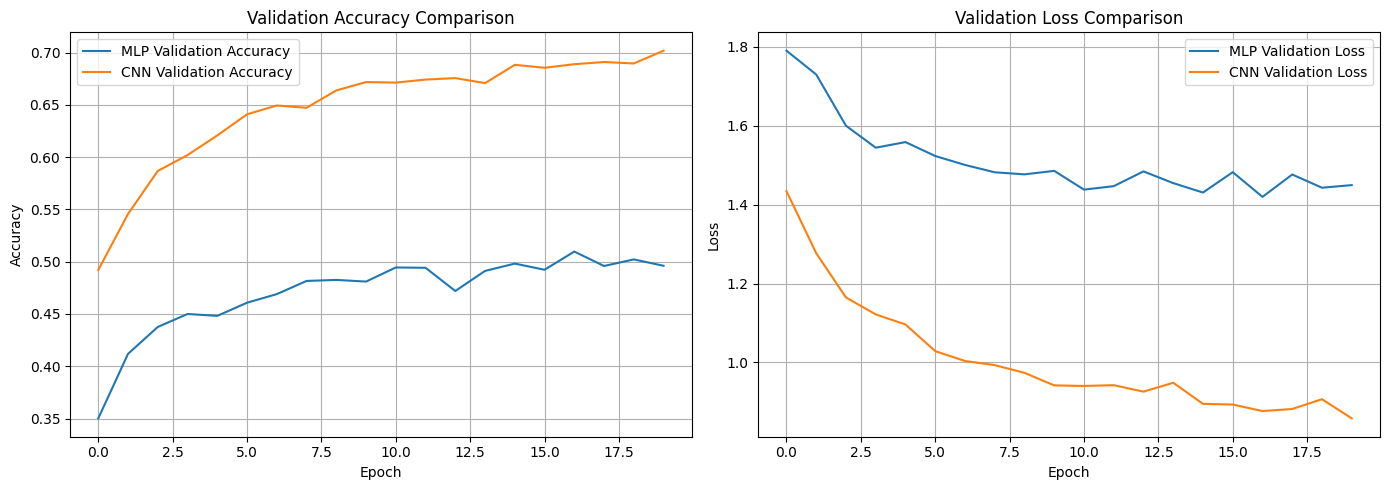

In [ ]:
plt.figure(figsize=(14, 5))

# Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['val_accuracy'], label='MLP Validation Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Validation Loss
plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['val_loss'], label='MLP Validation Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


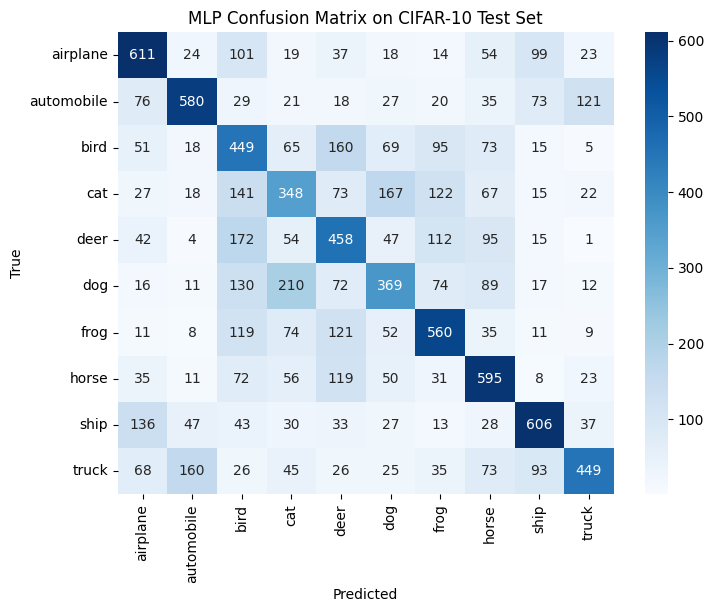

In [ ]:
# MLP Predictions
y_pred_mlp = np.argmax(mlp_model.predict(x_test), axis=1)

# MLP Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('MLP Confusion Matrix on CIFAR-10 Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


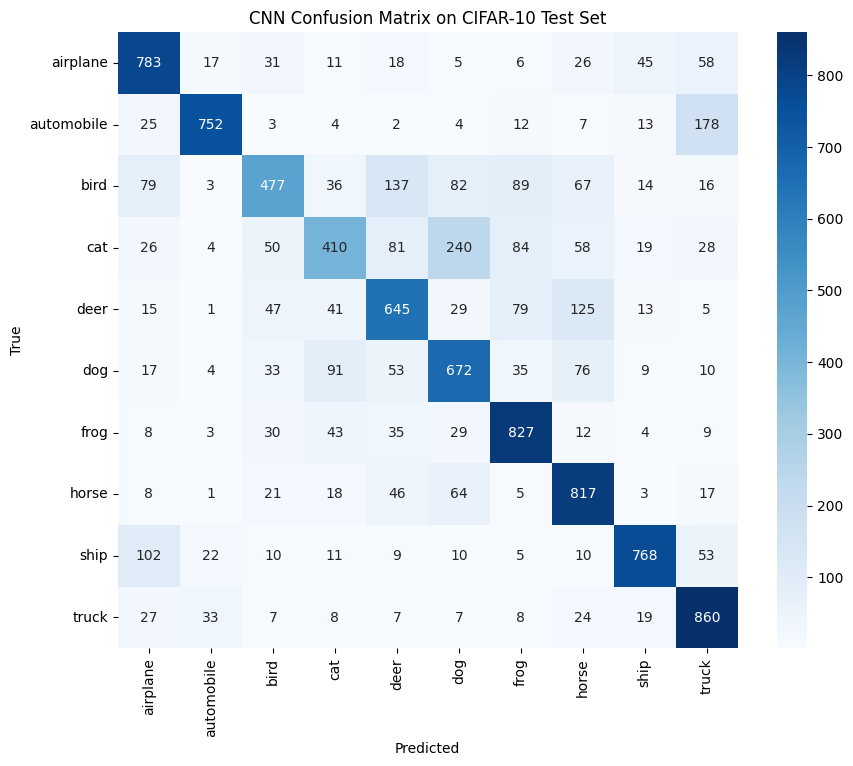

In [ ]:
y_pred_cnn = np.argmax(cnn_model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('CNN Confusion Matrix on CIFAR-10 Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Sample CNN Predictions (Green = correct, Red = wrong):


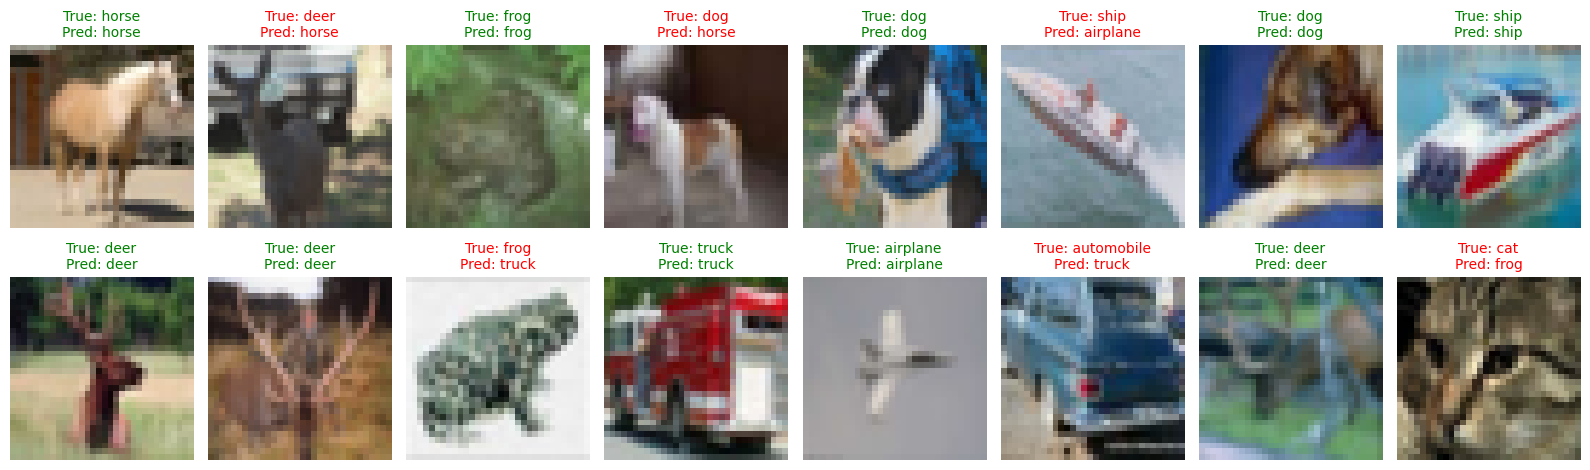

In [ ]:
def plot_samples(x, y_true, y_pred, nrows=2, ncols=8):
    plt.figure(figsize=(16, 5))
    indices = np.random.choice(len(x), nrows*ncols, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(x[idx])
        true_label = class_names[y_true[idx][0]]
        pred_label = class_names[y_pred[idx]]
        color = 'green' if true_label == pred_label else 'red'
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color, fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Sample CNN Predictions (Green = correct, Red = wrong):")
plot_samples(x_test, y_test, y_pred_cnn)

Sample MLP Predictions (Green = correct, Red = wrong):


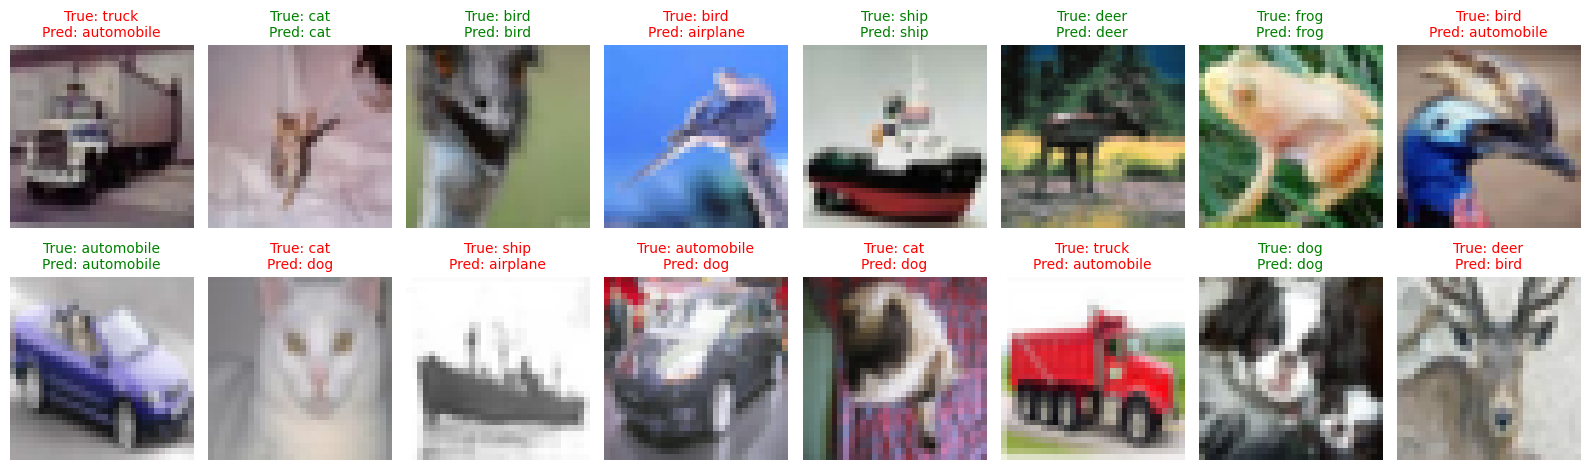

In [ ]:
def plot_samples_mlp(x, y_true, y_pred, nrows=2, ncols=8):
    plt.figure(figsize=(16, 5))
    indices = np.random.choice(len(x), nrows*ncols, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(x[idx])
        true_label = class_names[y_true[idx][0]]
        pred_label = class_names[y_pred[idx]]
        color = 'green' if true_label == pred_label else 'red'
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color, fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Sample MLP Predictions (Green = correct, Red = wrong):")
plot_samples_mlp(x_test, y_test, y_pred_mlp)